In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Final Data Processing.

In [2]:
df = pd.read_csv('final_data_0_iter.csv') #iterations = 0, nbit = 64

In [3]:
df

,name,molweight,critical temperature (K),acentric factor,boiling point (K),SMILES,ECFP_Bits
0,(+)-camphene,136.23704,638.00,0.2960,432.65,CC1(C)C2CCC(C2)C1=C,0000000000000000000000100000001001001000000000...
1,(-)-a-pinene,136.23704,647.00,0.3410,429.35,CC1=CC[C@H]2C[C@@H]1C2(C)C,0000000000000000010000000000001001001000000000...
2,(-)-camphene,136.23704,638.00,0.2960,439.95,CC1(C)C2CCC(C2)C1=C,0000000000000000000000100000001001001000000000...
3,"(1,1-dimethylbutyl)benzene",162.27492,697.15,0.4370,478.65,CCCC(C)(C)c1ccccc1,0000000000000000110000000000000001001000000000...
4,(1-butylhexadecyl)benzene,358.65124,851.65,0.7590,693.15,CCCCCCCCCCCCCCCC(CCCC)c1ccccc1,0100000000000000110000000000000001001000000000...
...,...,...,...,...,...,...,...
5895,vinylacetylene,52.07576,454.00,0.1180,278.25,C/C=C/C=C,0000000000000000000000100000000001000000000000...
5896,vinylcyclohexene,108.18328,599.00,0.3290,401.00,CC(C)/C=C/Cl,0100000000000000000100000000000001000000000000...
5897,water,18.01528,647.13,0.3449,373.15,C/C=C/CF,0000000010000000100000000000000001000000000000...
5898,zirconium chloride,233.03480,778.00,0.2980,604.15,C\C(c1ccccc1)=C(\C)c2ccccc2,0000000000000000010000000000000001001001000000...


In [4]:
df.describe()

,molweight,critical temperature (K),acentric factor,boiling point (K)
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,162.792075,650.688900,0.489841,460.435158
std,75.747231,109.978203,0.205024,95.686479
min,16.042760,126.200000,0.010500,77.340000
25%,114.230920,587.155000,0.332000,400.990000
50%,148.181780,639.915000,0.447000,456.150000
75%,182.349440,720.627500,0.645250,513.150000
max,626.327880,1314.000000,1.116000,797.080000


#### Get distribution of the different properties

array([[<AxesSubplot:title={'center':'molweight'}>,
        <AxesSubplot:title={'center':'critical temperature (K)'}>],
       [<AxesSubplot:title={'center':'acentric factor'}>,
        <AxesSubplot:title={'center':'boiling point (K)'}>]], dtype=object)

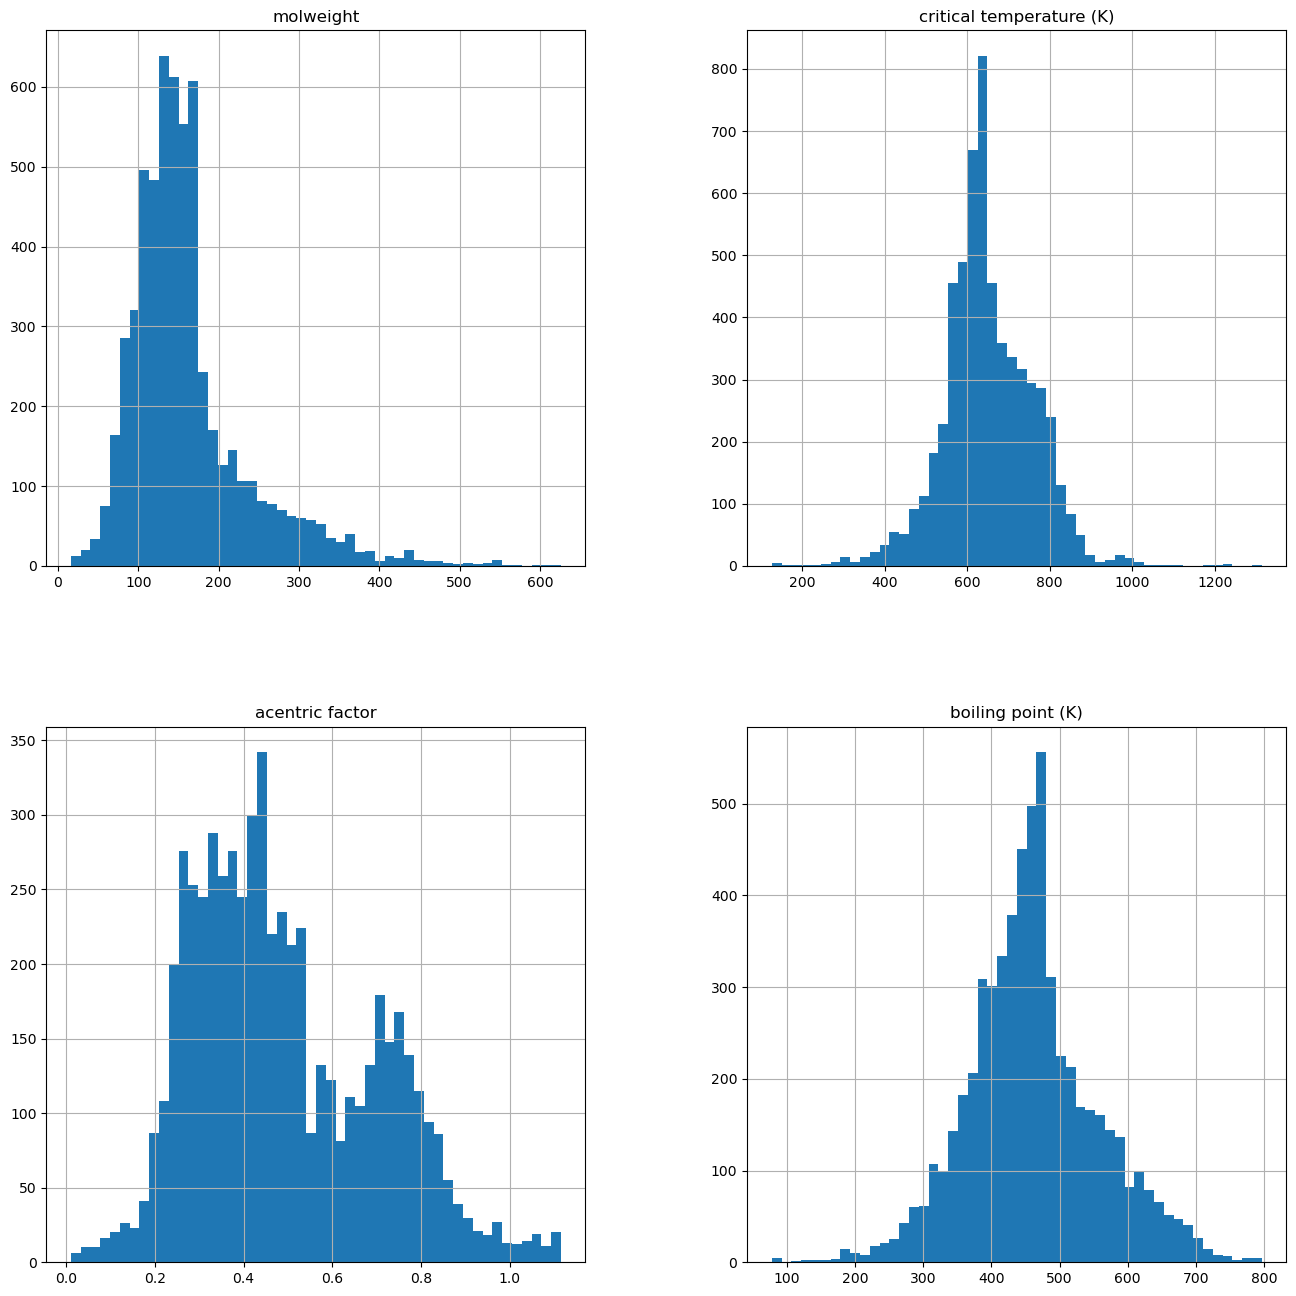

In [5]:
df[['molweight','critical temperature (K)','acentric factor','boiling point (K)']].hist(layout=(2,2),figsize=(16,16),bins=50)

In [6]:
df['ECFP_Bits'].apply(lambda x: len(x)).unique() #Verfiying all bit lengths

array([64], dtype=int64)

In [7]:
ECFP = df['ECFP_Bits'].str.split('',expand=True)

In [8]:
ECFP.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
1,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
2,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
3,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [9]:
ECFP.drop(columns=[0,65],inplace=True)

In [10]:
ECFP.head()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The ECFP dataframe can now be seen as Input X.

### Make dataset with molecular weight

In [39]:
ECFP_mol_weight = ECFP.copy(deep=True)
ECFP_mol_weight.insert(0,'MW',df['molweight'])

In [40]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,162.27492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,358.65124,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalise Molecular Weight data (using MinMaxScaler())

In [41]:
ECFP_mol_weight['MW'] = (ECFP_mol_weight['MW']-ECFP_mol_weight['MW'].min())/(ECFP_mol_weight['MW'].max()-ECFP_mol_weight['MW'].min())

In [42]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.239613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.561391,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Example 1: Using an ANN as a multi-output regression model. Using just ECFP

#### Neural Network Structure Used:
<br>**2 layer network** with dimensions: [64,3]
<br>**Activation Functions**: All Relu as an intial trial
<br>**Loss Function**: Mean Squared Error
<br>**Optimiser**: Adam
<br>**Epochs**: to be determined

In [43]:
#pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
y_cols = ['critical temperature (K)','acentric factor','boiling point (K)']

In [46]:
X = ECFP.astype(float); y= df[y_cols].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Number of hidden units for each layer are given in parameter "layer_dims"

In [47]:
model = Sequential()
model.add(Dense(64,input_shape=(64,),activation='relu'))
model.add(Dense(3,activation='relu'))

In [48]:
model.compile(loss='mse',optimizer='adam')

In [49]:
X_train.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
60    float64
61    float64
62    float64
63    float64
64    float64
Length: 64, dtype: object

In [50]:
model.fit(X_train,y_train,epochs = 300)

Epoch 1/300
148/148 [==============================] - 0s 887us/step - loss: 217369.0000
Epoch 2/300
148/148 [==============================] - 0s 870us/step - loss: 202817.7031
Epoch 3/300
148/148 [==============================] - 0s 858us/step - loss: 171475.9219
Epoch 4/300
148/148 [==============================] - 0s 885us/step - loss: 131071.7422
Epoch 5/300
148/148 [==============================] - 0s 1ms/step - loss: 90525.7500
Epoch 6/300
148/148 [==============================] - 0s 978us/step - loss: 57420.5078
Epoch 7/300
148/148 [==============================] - 0s 934us/step - loss: 35813.0938
Epoch 8/300
148/148 [==============================] - 0s 912us/step - loss: 24311.2285
Epoch 9/300
148/148 [==============================] - 0s 903us/step - loss: 19001.0059
Epoch 10/300
148/148 [==============================] - 0s 954us/step - loss: 16658.7148
Epoch 11/300
148/148 [==============================] - 0s 889us/step - loss: 15520.3818
Epoch 12/300
148/148 [======

148/148 [==============================] - 0s 2ms/step - loss: 6707.7671
Epoch 189/300
148/148 [==============================] - 0s 2ms/step - loss: 6709.9629
Epoch 190/300
148/148 [==============================] - 0s 3ms/step - loss: 6710.6992
Epoch 191/300
148/148 [==============================] - 0s 3ms/step - loss: 6704.9985
Epoch 192/300
148/148 [==============================] - 0s 2ms/step - loss: 6704.9370
Epoch 193/300
148/148 [==============================] - 1s 4ms/step - loss: 6708.3745
Epoch 194/300
148/148 [==============================] - 0s 3ms/step - loss: 6709.9590
Epoch 195/300
148/148 [==============================] - 0s 2ms/step - loss: 6704.0732
Epoch 196/300
148/148 [==============================] - 0s 2ms/step - loss: 6704.9297
Epoch 197/300
148/148 [==============================] - 1s 6ms/step - loss: 6697.0234
Epoch 198/300
148/148 [==============================] - 0s 2ms/step - loss: 6703.6904
Epoch 199/300
148/148 [==============================] - 

In [51]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 6737.0156


6737.015625

#### Evaluate Model for example 1 with K-fold cross validation

In [52]:
#THIS LINE TAKES A WHILE TO RUN!
"""
from sklearn.model_selection import RepeatedKFold

def get_model_example1():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss='mse',optimizer='adam')
    return model

def evaluate_model(X,y):
    results=list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3)
    
    for train_ix, test_ix in cv.split(X):
		# prepare data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        #Get and fit Model 
        model=get_model_example1()
        model.fit(X_train,y_train,epochs = 150)
        mae = model.evaluate(X_test,y_test,verbose = 0)
        print(mse)
        results.append(mse)
    return results

results = evaluate_model(X,y)
"""

"\nfrom sklearn.model_selection import RepeatedKFold\n\ndef get_model_example1():\n    model = Sequential()\n    \n    model.add(Dense(512,input_shape=(1024,),activation='relu'))\n    model.add(Dense(256, activation = 'relu'))\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(3,activation='relu'))\n    \n    model.compile(loss='mse',optimizer='adam')\n    return model\n\ndef evaluate_model(X,y):\n    results=list()\n    n_inputs, n_outputs = X.shape[1], y.shape[1]\n    cv = RepeatedKFold(n_splits=10, n_repeats=3)\n    \n    for train_ix, test_ix in cv.split(X):\n\t\t# prepare data\n        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]\n        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]\n        #Get and fit Model \n        model=get_model_example1()\n        model.fit(X_train,y_train,epochs = 150)\n        mae = model.evaluate(X_test,y_test,verbose = 0)\n        print(mse)\n        results.append(mse)\n    return results\n\nresults = evaluate_model(X,y)\n

#### Evaluating Model using Percentage Error

In [53]:
predictions = model.predict(X_test)

In [54]:
predictions[:5]

array([[6.3430823e+02, 4.0540755e-01, 4.4600806e+02],
       [6.4672052e+02, 4.1583097e-01, 4.5696149e+02],
       [6.9926593e+02, 4.5926586e-01, 4.9910376e+02],
       [6.5165497e+02, 4.0291342e-01, 4.6307608e+02],
       [6.5028046e+02, 4.5644566e-01, 4.6193277e+02]], dtype=float32)

In [55]:
predictions_df = pd.DataFrame(predictions,columns=y_cols)

In [56]:
predictions_df

,critical temperature (K),acentric factor,boiling point (K)
0,634.308228,0.405408,446.008057
1,646.720520,0.415831,456.961487
2,699.265930,0.459266,499.103760
3,651.654968,0.402913,463.076080
4,650.280457,0.456446,461.932770
...,...,...,...
1175,661.481750,0.391299,464.434967
1176,665.883728,0.372743,471.015625
1177,665.956604,0.431533,469.692505
1178,699.265930,0.459266,499.103760


In [57]:
predictions_df.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,653.603943,0.421683,462.737274
std,27.188311,0.046690,21.357813
min,399.027954,0.007007,259.773010
25%,637.651672,0.402178,451.663147
50%,649.470154,0.422915,461.877747
75%,671.435730,0.446364,475.941040
max,843.968506,0.664524,602.382385


In [58]:
y_test.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,647.867992,0.486732,457.928814
std,108.936191,0.204240,95.674619
min,261.000000,0.032000,161.850000
25%,582.000000,0.328750,395.762500
50%,637.225000,0.446000,454.000000
75%,719.552500,0.643500,508.362500
max,1216.860000,1.105000,793.150000


It looks like predictions for Critical Temperature and boiling point are somewhat okay (possibly after experimenting with hyperparameters, the performance of the ANN might be better). But the model is useless at predicting acentric factor (it is guessing every value as 0).

Multi-ouput ANN is not effective. Deal with them 1 by 1.

Now for Critical Temperature & Boiling point, calculate %errors

In [59]:
perc_errors = np.abs((y_test-predictions)/y_test)*100

In [60]:
perc_errors.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,13.467781,40.048616,17.172804
std,13.968676,63.471961,18.273013
min,0.031862,0.007054,0.010095
25%,4.908770,14.232642,4.849756
50%,10.273467,30.992170,12.924419
75%,17.475820,46.228301,23.221908
max,160.328879,1127.085106,197.329982


Critical Temperature and Boiling Point had an average percentage error of 16.6% and 20.5% respectively!

### 2.1 Testing different numbers of Epochs

In [35]:
loss_func = 'mse'
epochs_trial = [10,25,50,100,250]
history_list = []
for epoch in epochs_trial:
    model = Sequential()
    model.add(Dense(63,input_shape=(64,),activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss=loss_func,optimizer='adam')
    
    history = model.fit(X_train,y_train,epochs = epoch)
    
    eval_val = model.evaluate(X_test,y_test)
    history_list.append([history, eval_val])

Epoch 1/10
148/148 [==============================] - 1s 961us/step - loss: 216436.3125
Epoch 2/10
148/148 [==============================] - 0s 972us/step - loss: 201426.6406
Epoch 3/10
148/148 [==============================] - 0s 888us/step - loss: 169398.0625
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 129359.0078
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 89569.8750
Epoch 6/10
148/148 [==============================] - 0s 954us/step - loss: 56806.3438
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 35818.1992
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 24510.5586
Epoch 9/10
148/148 [==============================] - 0s 987us/step - loss: 19006.6523
Epoch 10/10
37/37 [==============================] - 0s 955us/step - loss: 17484.2500
Epoch 1/25
148/148 [==============================] - 1s 995us/step - loss: 216660.4531
Epoch 2/25
148/148 [===========================

148/148 [==============================] - 0s 2ms/step - loss: 195968.2188
Epoch 3/250
148/148 [==============================] - 0s 2ms/step - loss: 160082.6094
Epoch 4/250
148/148 [==============================] - 0s 2ms/step - loss: 116003.9453
Epoch 5/250
148/148 [==============================] - 0s 2ms/step - loss: 75033.0312
Epoch 6/250
148/148 [==============================] - 0s 2ms/step - loss: 45465.0156
Epoch 7/250
148/148 [==============================] - 0s 2ms/step - loss: 28657.8574
Epoch 8/250
148/148 [==============================] - 0s 2ms/step - loss: 20610.8789
Epoch 9/250
148/148 [==============================] - 0s 2ms/step - loss: 17079.9160
Epoch 10/250
148/148 [==============================] - 0s 2ms/step - loss: 15456.3525
Epoch 11/250
148/148 [==============================] - 0s 2ms/step - loss: 14608.8662
Epoch 12/250
148/148 [==============================] - 0s 2ms/step - loss: 14081.6475
Epoch 13/250
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 6814.1597
Epoch 98/250
148/148 [==============================] - 0s 2ms/step - loss: 6807.7539
Epoch 99/250
148/148 [==============================] - 0s 2ms/step - loss: 6797.7329
Epoch 100/250
148/148 [==============================] - 0s 2ms/step - loss: 6794.1445
Epoch 101/250
148/148 [==============================] - 0s 2ms/step - loss: 6783.9707
Epoch 102/250
148/148 [==============================] - 0s 2ms/step - loss: 6777.3271
Epoch 103/250
148/148 [==============================] - 0s 2ms/step - loss: 6772.0405
Epoch 104/250
148/148 [==============================] - 0s 2ms/step - loss: 6768.1060
Epoch 105/250
148/148 [==============================] - 0s 2ms/step - loss: 6758.4463
Epoch 106/250
148/148 [==============================] - 0s 2ms/step - loss: 6757.0347
Epoch 107/250
148/148 [==============================] - 0s 2ms/step - loss: 6759.6807
Epoch 108/250
148/148 [==============================] - 0s

In [36]:
history_list

[[<tensorflow.python.keras.callbacks.History at 0x21c2d086550>, 17484.25],
  13157.1396484375],
  9805.169921875],
  7660.5302734375],
 [<tensorflow.python.keras.callbacks.History at 0x21c2d1215e0>, 7432.6875]]

In [37]:
training_loss = [x[0].history['loss'][-1] for x in history_list] #Training losses at final epoch
test_loss = [x[1] for x in history_list]

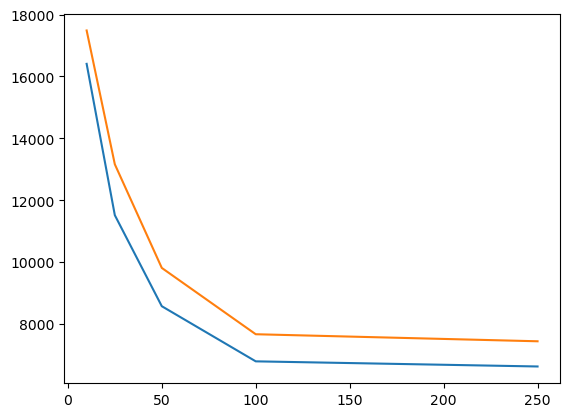

In [38]:
plt.plot(epochs_trial,training_loss, label='Training Losses')
plt.plot(epochs_trial,test_loss, label='Test Losses')

## 3. Example 2: ANN with ECFP and Molecular Weight data.

Used same ANN structure as Example 1

In [61]:
def get_model_example2():
    model = Sequential()
    model.add(Dense(32,input_shape=(65,),activation='relu'))
    model.add(Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer='adam')
    return model

In [62]:
X_mol = ECFP_mol_weight.astype(float); y_mol= df[y_cols].astype(float)
X_mol_train, X_mol_test, y_mol_train, y_mol_test = train_test_split(X_mol, y_mol, test_size=0.20)

In [63]:
model_example2 = get_model_example2()
model_example2.fit(X_mol_train,y_mol_train,epochs=150)

Epoch 1/150
148/148 [==============================] - 0s 847us/step - loss: 216597.4531
Epoch 2/150
148/148 [==============================] - 0s 871us/step - loss: 209208.6250
Epoch 3/150
148/148 [==============================] - 0s 901us/step - loss: 193337.9531
Epoch 4/150
148/148 [==============================] - 0s 889us/step - loss: 169084.5625
Epoch 5/150
148/148 [==============================] - 0s 1ms/step - loss: 140721.2812
Epoch 6/150
148/148 [==============================] - 0s 1ms/step - loss: 111873.6953
Epoch 7/150
148/148 [==============================] - 0s 994us/step - loss: 85204.0156
Epoch 8/150
148/148 [==============================] - 0s 888us/step - loss: 62605.0977
Epoch 9/150
148/148 [==============================] - 0s 947us/step - loss: 45040.6328
Epoch 10/150
148/148 [==============================] - 0s 1ms/step - loss: 32550.9492
Epoch 11/150
148/148 [==============================] - 0s 984us/step - loss: 24400.2363
Epoch 12/150
148/148 [========

In [64]:
model_example2.evaluate(X_mol_test,y_mol_test)

37/37 [==============================] - 0s 2ms/step - loss: 3201.8850


3201.885009765625

##### Adding the molecular weight seems to have helped performance by a significant margin!

Try Different Numbers of Epochs (graphing out testing set loss)

In [65]:
epochs_mol = [10,25,50,100,150,250,300,350,400,500,600,700]

In [66]:
test_loss = []
predictions_mol = []

for epoch in epochs_mol:
    model=get_model_example2()
    model.fit(X_mol_train,y_mol_train,epochs=epoch)
    evaluation = model.evaluate(X_mol_test,y_mol_test)
    predictions = model.predict(X_mol_test)
    
    test_loss.append(evaluation)
    predictions_mol.append(predictions)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 216468.0156
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 207984.8750
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 191443.2969
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 168119.3281
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 140305.1719
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 111687.0703
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 85221.3594
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 62821.0430
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 45410.3398
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 29538.4922
Epoch 1/25
148/148 [==============================] - 1s 1ms/step - loss: 216606.6250
Epoch 2/25
148/148 [==============================] - 0s 1m

148/148 [==============================] - 0s 1ms/step - loss: 47961.0234
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 35029.4102
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 26321.4941
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 20814.1875
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 17483.8809
Epoch 14/100
148/148 [==============================] - 0s 1ms/step - loss: 15481.2949
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 14241.5137
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 13435.7305
Epoch 17/100
148/148 [==============================] - 0s 1ms/step - loss: 12884.7305
Epoch 18/100
148/148 [==============================] - 0s 1ms/step - loss: 12475.0283
Epoch 19/100
148/148 [==============================] - 0s 1ms/step - loss: 12151.0000
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3298.8816
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3293.0308
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3288.8997
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3283.3652
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3279.3777
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3275.0098
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3270.4680
Epoch 105/150
148/148 [==============================] - 0s 1ms/step - loss: 3265.9551
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 3263.0112
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 3260.3948
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 3255.7717
Epoch 109/150
148/148 [==============================] - 0

Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 3216.5112
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 3216.6201
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 3215.7095
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3212.6211
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3213.5667
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3209.8262
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3205.6082
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3205.8826
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3203.8062
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3202.1614
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3198.6294
Epoch 147/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 3565.9487
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 3536.6143
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 3508.2732
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3487.4014
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3466.4080
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3445.9768
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3434.2488
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3412.7776
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3398.3218
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3386.1721
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3375.2043
Epoch 85/300
148/148 [==============================] - 1s 4ms/step

148/148 [==============================] - 0s 1ms/step - loss: 3058.8308
Epoch 263/300
148/148 [==============================] - 0s 2ms/step - loss: 3057.4602
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 3056.0906
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3056.2192
Epoch 266/300
148/148 [==============================] - 0s 1ms/step - loss: 3054.8887
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3053.7986
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3053.8293
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 3051.3450
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 3051.5066
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 3050.5764
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 3048.5161
Epoch 273/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3187.8152
Epoch 150/350
148/148 [==============================] - 0s 2ms/step - loss: 3189.2012
Epoch 151/350
148/148 [==============================] - 0s 2ms/step - loss: 3188.8911
Epoch 152/350
148/148 [==============================] - 0s 2ms/step - loss: 3184.4167
Epoch 153/350
148/148 [==============================] - 0s 2ms/step - loss: 3183.7939
Epoch 154/350
148/148 [==============================] - 0s 2ms/step - loss: 3183.8972
Epoch 155/350
148/148 [==============================] - 0s 2ms/step - loss: 3180.0764
Epoch 156/350
148/148 [==============================] - 0s 2ms/step - loss: 3180.9194
Epoch 157/350
148/148 [==============================] - 0s 2ms/step - loss: 3178.2451
Epoch 158/350
148/148 [==============================] - 0s 2ms/step - loss: 3176.8577
Epoch 159/350
148/148 [==============================] - 0s 2ms/step - loss: 3174.1377
Epoch 160/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2924.9294
Epoch 338/350
148/148 [==============================] - 0s 2ms/step - loss: 2926.0649
Epoch 339/350
148/148 [==============================] - 0s 2ms/step - loss: 2925.4463
Epoch 340/350
148/148 [==============================] - 0s 2ms/step - loss: 2925.0210
Epoch 341/350
148/148 [==============================] - 0s 2ms/step - loss: 2924.7598
Epoch 342/350
148/148 [==============================] - 0s 2ms/step - loss: 2923.0715
Epoch 343/350
148/148 [==============================] - 0s 2ms/step - loss: 2921.7629
Epoch 344/350
148/148 [==============================] - 0s 2ms/step - loss: 2922.7632
Epoch 345/350
148/148 [==============================] - 0s 2ms/step - loss: 2919.6675
Epoch 346/350
148/148 [==============================] - 0s 2ms/step - loss: 2918.5562
Epoch 347/350
148/148 [==============================] - 0s 2ms/step - loss: 2915.1455
Epoch 348/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3779.1072
Epoch 82/400
148/148 [==============================] - 0s 2ms/step - loss: 3745.3550
Epoch 83/400
148/148 [==============================] - 0s 2ms/step - loss: 3713.3245
Epoch 84/400
148/148 [==============================] - 0s 2ms/step - loss: 3685.8127
Epoch 85/400
148/148 [==============================] - 0s 2ms/step - loss: 3658.5017
Epoch 86/400
148/148 [==============================] - 0s 2ms/step - loss: 3632.4106
Epoch 87/400
148/148 [==============================] - 0s 2ms/step - loss: 3610.1838
Epoch 88/400
148/148 [==============================] - 0s 2ms/step - loss: 3586.5823
Epoch 89/400
148/148 [==============================] - 0s 2ms/step - loss: 3565.6836
Epoch 90/400
148/148 [==============================] - 0s 2ms/step - loss: 3549.8745
Epoch 91/400
148/148 [==============================] - 0s 2ms/step - loss: 3530.5034
Epoch 92/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3232.5225
Epoch 270/400
148/148 [==============================] - 0s 2ms/step - loss: 3232.4600
Epoch 271/400
148/148 [==============================] - 0s 2ms/step - loss: 3231.9067
Epoch 272/400
148/148 [==============================] - 0s 2ms/step - loss: 3230.6750
Epoch 273/400
148/148 [==============================] - 0s 2ms/step - loss: 3230.9207
Epoch 274/400
148/148 [==============================] - 0s 2ms/step - loss: 3231.4573
Epoch 275/400
148/148 [==============================] - 0s 2ms/step - loss: 3230.9346
Epoch 276/400
148/148 [==============================] - 0s 2ms/step - loss: 3230.0776
Epoch 277/400
148/148 [==============================] - 0s 2ms/step - loss: 3229.6323
Epoch 278/400
148/148 [==============================] - 0s 2ms/step - loss: 3228.8740
Epoch 279/400
148/148 [==============================] - 0s 2ms/step - loss: 3228.9272
Epoch 280/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5325.8721
Epoch 57/500
148/148 [==============================] - 0s 2ms/step - loss: 5197.8145
Epoch 58/500
148/148 [==============================] - 0s 2ms/step - loss: 5074.8730
Epoch 59/500
148/148 [==============================] - 0s 2ms/step - loss: 4960.6074
Epoch 60/500
148/148 [==============================] - 0s 2ms/step - loss: 4848.6035
Epoch 61/500
148/148 [==============================] - 0s 2ms/step - loss: 4741.5786
Epoch 62/500
148/148 [==============================] - 0s 2ms/step - loss: 4638.2100
Epoch 63/500
148/148 [==============================] - 0s 2ms/step - loss: 4541.3960
Epoch 64/500
148/148 [==============================] - 0s 2ms/step - loss: 4450.2612
Epoch 65/500
148/148 [==============================] - 0s 2ms/step - loss: 4363.5635
Epoch 66/500
148/148 [==============================] - 0s 2ms/step - loss: 4281.7559
Epoch 67/500
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3144.0623
Epoch 245/500
148/148 [==============================] - 0s 2ms/step - loss: 3143.0952
Epoch 246/500
148/148 [==============================] - 0s 2ms/step - loss: 3142.0139
Epoch 247/500
148/148 [==============================] - 0s 3ms/step - loss: 3142.3999
Epoch 248/500
148/148 [==============================] - 0s 3ms/step - loss: 3139.5466
Epoch 249/500
148/148 [==============================] - 0s 3ms/step - loss: 3138.7415
Epoch 250/500
148/148 [==============================] - 0s 2ms/step - loss: 3138.3108
Epoch 251/500
148/148 [==============================] - 0s 2ms/step - loss: 3137.8584
Epoch 252/500
148/148 [==============================] - 0s 2ms/step - loss: 3137.4585
Epoch 253/500
148/148 [==============================] - 0s 2ms/step - loss: 3136.2422
Epoch 254/500
148/148 [==============================] - 0s 2ms/step - loss: 3133.1421
Epoch 255/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2994.7180
Epoch 433/500
148/148 [==============================] - 0s 2ms/step - loss: 2996.4026
Epoch 434/500
148/148 [==============================] - 0s 2ms/step - loss: 2996.1787
Epoch 435/500
148/148 [==============================] - 0s 2ms/step - loss: 2994.6560
Epoch 436/500
148/148 [==============================] - 0s 2ms/step - loss: 2995.3760
Epoch 437/500
148/148 [==============================] - 0s 2ms/step - loss: 2994.2012
Epoch 438/500
148/148 [==============================] - 0s 2ms/step - loss: 2993.4014
Epoch 439/500
148/148 [==============================] - 0s 2ms/step - loss: 2994.1296
Epoch 440/500
148/148 [==============================] - 0s 2ms/step - loss: 2991.6230
Epoch 441/500
148/148 [==============================] - 0s 2ms/step - loss: 2993.5254
Epoch 442/500
148/148 [==============================] - 0s 2ms/step - loss: 2993.0439
Epoch 443/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3266.6401
Epoch 121/600
148/148 [==============================] - 0s 2ms/step - loss: 3264.0803
Epoch 122/600
148/148 [==============================] - 0s 1ms/step - loss: 3262.3210
Epoch 123/600
148/148 [==============================] - 0s 2ms/step - loss: 3259.7944
Epoch 124/600
148/148 [==============================] - 0s 2ms/step - loss: 3255.4307
Epoch 125/600
148/148 [==============================] - 0s 2ms/step - loss: 3256.4473
Epoch 126/600
148/148 [==============================] - 0s 2ms/step - loss: 3251.6545
Epoch 127/600
148/148 [==============================] - 0s 1ms/step - loss: 3250.9783
Epoch 128/600
148/148 [==============================] - 0s 1ms/step - loss: 3248.2698
Epoch 129/600
148/148 [==============================] - 0s 2ms/step - loss: 3246.7920
Epoch 130/600
148/148 [==============================] - 0s 2ms/step - loss: 3245.9531
Epoch 131/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3032.8420
Epoch 309/600
148/148 [==============================] - 0s 2ms/step - loss: 3032.7156
Epoch 310/600
148/148 [==============================] - 0s 2ms/step - loss: 3030.7637
Epoch 311/600
148/148 [==============================] - 0s 2ms/step - loss: 3033.7671
Epoch 312/600
148/148 [==============================] - 0s 2ms/step - loss: 3029.7537
Epoch 313/600
148/148 [==============================] - 0s 2ms/step - loss: 3028.8330
Epoch 314/600
148/148 [==============================] - 0s 2ms/step - loss: 3029.5393
Epoch 315/600
148/148 [==============================] - 0s 2ms/step - loss: 3027.0793
Epoch 316/600
148/148 [==============================] - 0s 2ms/step - loss: 3027.7402
Epoch 317/600
148/148 [==============================] - 0s 2ms/step - loss: 3027.9827
Epoch 318/600
148/148 [==============================] - 0s 2ms/step - loss: 3026.6887
Epoch 319/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2910.7419
Epoch 497/600
148/148 [==============================] - 0s 2ms/step - loss: 2910.6643
Epoch 498/600
148/148 [==============================] - 0s 2ms/step - loss: 2910.2175
Epoch 499/600
148/148 [==============================] - 0s 2ms/step - loss: 2911.8950
Epoch 500/600
148/148 [==============================] - 0s 2ms/step - loss: 2909.4424
Epoch 501/600
148/148 [==============================] - 0s 2ms/step - loss: 2909.9241
Epoch 502/600
148/148 [==============================] - 0s 2ms/step - loss: 2909.8625
Epoch 503/600
148/148 [==============================] - 0s 2ms/step - loss: 2909.1177
Epoch 504/600
148/148 [==============================] - 1s 4ms/step - loss: 2907.9456
Epoch 505/600
148/148 [==============================] - 0s 3ms/step - loss: 2908.5752
Epoch 506/600
148/148 [==============================] - 0s 2ms/step - loss: 2906.9526
Epoch 507/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3473.1494
Epoch 85/700
148/148 [==============================] - 0s 2ms/step - loss: 3455.6094
Epoch 86/700
148/148 [==============================] - 0s 2ms/step - loss: 3440.5237
Epoch 87/700
148/148 [==============================] - 0s 2ms/step - loss: 3424.5051
Epoch 88/700
148/148 [==============================] - 0s 2ms/step - loss: 3410.2507
Epoch 89/700
148/148 [==============================] - 0s 2ms/step - loss: 3398.9114
Epoch 90/700
148/148 [==============================] - 0s 2ms/step - loss: 3387.8687
Epoch 91/700
148/148 [==============================] - 0s 2ms/step - loss: 3377.6282
Epoch 92/700
148/148 [==============================] - 0s 2ms/step - loss: 3369.9480
Epoch 93/700
148/148 [==============================] - 0s 2ms/step - loss: 3362.8596
Epoch 94/700
148/148 [==============================] - 0s 1ms/step - loss: 3351.2971
Epoch 95/700
148/148 [==============================] - 0s 1ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3077.8613
Epoch 273/700
148/148 [==============================] - 0s 2ms/step - loss: 3077.1411
Epoch 274/700
148/148 [==============================] - 0s 2ms/step - loss: 3075.6724
Epoch 275/700
148/148 [==============================] - 0s 2ms/step - loss: 3075.2815
Epoch 276/700
148/148 [==============================] - 0s 2ms/step - loss: 3074.9236
Epoch 277/700
148/148 [==============================] - 0s 2ms/step - loss: 3073.2380
Epoch 278/700
148/148 [==============================] - 0s 2ms/step - loss: 3072.4521
Epoch 279/700
148/148 [==============================] - 0s 2ms/step - loss: 3071.8115
Epoch 280/700
148/148 [==============================] - 0s 2ms/step - loss: 3070.4050
Epoch 281/700
148/148 [==============================] - 0s 2ms/step - loss: 3069.4937
Epoch 282/700
148/148 [==============================] - 0s 2ms/step - loss: 3065.8281
Epoch 283/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2949.0007
Epoch 461/700
148/148 [==============================] - 0s 2ms/step - loss: 2947.3335
Epoch 462/700
148/148 [==============================] - 0s 2ms/step - loss: 2944.9856
Epoch 463/700
148/148 [==============================] - 0s 2ms/step - loss: 2947.9912
Epoch 464/700
148/148 [==============================] - 0s 2ms/step - loss: 2944.8242
Epoch 465/700
148/148 [==============================] - 0s 2ms/step - loss: 2945.2556
Epoch 466/700
148/148 [==============================] - 0s 2ms/step - loss: 2945.1580
Epoch 467/700
148/148 [==============================] - 0s 2ms/step - loss: 2944.8792
Epoch 468/700
148/148 [==============================] - 0s 2ms/step - loss: 2944.3577
Epoch 469/700
148/148 [==============================] - 0s 2ms/step - loss: 2942.1467
Epoch 470/700
148/148 [==============================] - 0s 2ms/step - loss: 2943.6196
Epoch 471/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2878.9316
Epoch 649/700
148/148 [==============================] - 0s 2ms/step - loss: 2878.7683
Epoch 650/700
148/148 [==============================] - 0s 2ms/step - loss: 2878.0181
Epoch 651/700
148/148 [==============================] - 0s 2ms/step - loss: 2878.1978
Epoch 652/700
148/148 [==============================] - 0s 2ms/step - loss: 2878.8171
Epoch 653/700
148/148 [==============================] - 0s 2ms/step - loss: 2875.0916
Epoch 654/700
148/148 [==============================] - 0s 2ms/step - loss: 2875.2305
Epoch 655/700
148/148 [==============================] - 0s 2ms/step - loss: 2878.3083
Epoch 656/700
148/148 [==============================] - 0s 2ms/step - loss: 2876.6885
Epoch 657/700
148/148 [==============================] - 0s 2ms/step - loss: 2875.0493
Epoch 658/700
148/148 [==============================] - 0s 2ms/step - loss: 2875.5425
Epoch 659/700
148/148 [==============================] - 

In [67]:
test_loss

[29538.4921875,
 10230.603515625,
 5954.22265625,
 3317.8349609375,
 3161.165771484375,
 3108.7021484375,
 3121.66015625,
 3033.763916015625,
 3163.49951171875,
 3055.04248046875,
 2991.08251953125,
 3010.571044921875]

In [68]:
predictions

array([[6.1967780e+02, 5.8168286e-01, 4.3766998e+02],
       [7.7939038e+02, 7.5573820e-01, 5.8426740e+02],
       [6.2259491e+02, 4.9938479e-01, 4.3049921e+02],
       ...,
       [7.0378027e+02, 6.3269567e-01, 5.0654233e+02],
       [5.6806958e+02, 4.5093271e-01, 3.8061356e+02],
       [6.5234033e+02, 5.1986241e-01, 4.5820648e+02]], dtype=float32)

In [69]:
perc_errors_mol = np.abs((y_mol_test-predictions)/y_mol_test)*100

In [70]:
perc_errors_mol.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,8.337451,45.812029,9.517739
std,12.658141,98.626771,13.959886
min,0.002011,0.002621,0.007151
25%,2.694701,15.321597,2.727828
50%,5.490354,30.446059,6.035092
75%,10.426012,51.745830,11.726809
max,268.290206,2708.182077,256.034315


In [71]:
predictions_mol_df = pd.DataFrame(predictions, columns = y_cols)
predictions_mol_df.head()

,critical temperature (K),acentric factor,boiling point (K)
0,619.677795,0.581683,437.669983
1,779.390381,0.755738,584.267395
2,622.594910,0.499385,430.499207
3,639.089661,0.546183,459.761658
4,623.816284,0.572160,448.289368


In [72]:
y_mol_test.head()

,critical temperature (K),acentric factor,boiling point (K)
3199,593.62,0.411,418.15
5822,790.00,0.780,614.43
5266,704.00,0.462,482.65
1649,630.85,0.716,466.00
1379,601.30,0.357,421.56


Since this model is not effective for Acentric factor, train a multi-output regression network for Critical Temperature and Boiling Point. Variables for this model type will be labeled with "final"

## 4. Multi-output ANN (Critical and Boiling temperatures only)

In [73]:
y_cols_final = ['critical temperature (K)','boiling point (K)']

In [74]:
X_final = ECFP_mol_weight.astype(float); y_final= df[y_cols_final].astype(float)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20)

In [75]:
def get_model(layer_dims,activations,n_input=65,loss_f='mse'):
    """Returns a compiled model using input layer_dims & activations. layer_dims = [512,256,2]
    Will return a layer with 2 hidden layers with 512,256 units and an output layer
    with 2 units"""
    model = Sequential()
    #First hidden layer
    model.add(Dense(layer_dims[0],input_shape=(n_input,),activation=activations[0]))
    
    #Other hidden layers
    for i in range(1,len(layer_dims)-1):
        model.add(Dense(layer_dims[i],activation=activations[i]))

    model.add(Dense(layer_dims[-1],activation=activations[-1]))

    model.compile(loss=loss_f,optimizer='adam')
    return model

In [76]:
layer_dims = [32,2]
activations = ['relu','relu']
trial_epochs = [10,25,50,75,100,150,200,300,400,500,600,750]
test_loss_final = []
for epoch in trial_epochs:  
    model = get_model(layer_dims,activations)
    model.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model.evaluate(X_final_test,y_final_test)
    
    test_loss_final.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 831us/step - loss: 326342.1562
Epoch 2/10
148/148 [==============================] - 0s 872us/step - loss: 313409.7188
Epoch 3/10
148/148 [==============================] - 0s 856us/step - loss: 289520.8438
Epoch 4/10
148/148 [==============================] - 0s 941us/step - loss: 256094.2656
Epoch 5/10
148/148 [==============================] - 0s 974us/step - loss: 217217.7812
Epoch 6/10
148/148 [==============================] - 0s 840us/step - loss: 177043.3594
Epoch 7/10
148/148 [==============================] - 0s 789us/step - loss: 138819.6094
Epoch 8/10
148/148 [==============================] - 0s 905us/step - loss: 104468.8203
Epoch 9/10
148/148 [==============================] - 0s 824us/step - loss: 76353.6016
Epoch 10/10
37/37 [==============================] - 0s 734us/step - loss: 45563.1914
Epoch 1/25
148/148 [==============================] - 0s 745us/step - loss: 327248.7188
Epoch 2/25
148/148 [===============

148/148 [==============================] - 0s 2ms/step - loss: 15842.6055
Epoch 26/100
148/148 [==============================] - 0s 2ms/step - loss: 15526.5020
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 15223.2324
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 14929.8037
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 14640.8828
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 14357.8174
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 14079.9121
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 13813.6641
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 13541.8320
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 13277.7344
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 13015.2422
Epoch 36/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 18343.2090
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 17921.9590
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 17547.8320
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 17196.3438
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 16865.1191
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 16548.8926
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 16245.7217
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 15949.9443
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 15664.1562
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 15386.0049
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 15114.7783
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 220967.0625
Epoch 56/200
148/148 [==============================] - 0s 1ms/step - loss: 220895.2344
Epoch 57/200
148/148 [==============================] - 0s 1ms/step - loss: 220829.5938
Epoch 58/200
148/148 [==============================] - 0s 1ms/step - loss: 220765.7969
Epoch 59/200
148/148 [==============================] - 0s 1ms/step - loss: 220708.4688
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 220653.5312
Epoch 61/200
148/148 [==============================] - 0s 1ms/step - loss: 220603.9375
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 220556.7031
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 220515.7188
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 220476.2656
Epoch 65/200
148/148 [==============================] - 0s 1ms/step - loss: 220440.8281
Epoch 66/200
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 10951.3496
Epoch 40/300
148/148 [==============================] - 0s 2ms/step - loss: 10673.7031
Epoch 41/300
148/148 [==============================] - 0s 2ms/step - loss: 10394.3643
Epoch 42/300
148/148 [==============================] - 0s 2ms/step - loss: 10124.2217
Epoch 43/300
148/148 [==============================] - 0s 2ms/step - loss: 9857.7314
Epoch 44/300
148/148 [==============================] - 0s 2ms/step - loss: 9600.6895
Epoch 45/300
148/148 [==============================] - 0s 2ms/step - loss: 9346.8604
Epoch 46/300
148/148 [==============================] - 0s 2ms/step - loss: 9104.9639
Epoch 47/300
148/148 [==============================] - 0s 2ms/step - loss: 8867.9131
Epoch 48/300
148/148 [==============================] - 0s 2ms/step - loss: 8642.8506
Epoch 49/300
148/148 [==============================] - 0s 2ms/step - loss: 8419.6826
Epoch 50/300
148/148 [==============================] - 0s 1ms/

Epoch 134/300
148/148 [==============================] - 0s 1ms/step - loss: 4936.4424
Epoch 135/300
148/148 [==============================] - 0s 2ms/step - loss: 4934.4409
Epoch 136/300
148/148 [==============================] - 0s 2ms/step - loss: 4931.9077
Epoch 137/300
148/148 [==============================] - 0s 2ms/step - loss: 4932.7002
Epoch 138/300
148/148 [==============================] - 0s 2ms/step - loss: 4927.4922
Epoch 139/300
148/148 [==============================] - 0s 1ms/step - loss: 4931.1113
Epoch 140/300
148/148 [==============================] - 0s 2ms/step - loss: 4928.0786
Epoch 141/300
148/148 [==============================] - 0s 2ms/step - loss: 4926.4282
Epoch 142/300
148/148 [==============================] - 0s 2ms/step - loss: 4926.0049
Epoch 143/300
148/148 [==============================] - 0s 2ms/step - loss: 4926.3477
Epoch 144/300
148/148 [==============================] - 0s 2ms/step - loss: 4922.5024
Epoch 145/300
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 17088.6094
Epoch 22/400
148/148 [==============================] - 0s 2ms/step - loss: 16738.1328
Epoch 23/400
148/148 [==============================] - 0s 2ms/step - loss: 16403.5801
Epoch 24/400
148/148 [==============================] - 0s 2ms/step - loss: 16079.5029
Epoch 25/400
148/148 [==============================] - 0s 2ms/step - loss: 15763.4561
Epoch 26/400
148/148 [==============================] - 0s 2ms/step - loss: 15460.8184
Epoch 27/400
148/148 [==============================] - 0s 2ms/step - loss: 15164.8613
Epoch 28/400
148/148 [==============================] - 0s 2ms/step - loss: 14875.8115
Epoch 29/400
148/148 [==============================] - 0s 2ms/step - loss: 14590.9512
Epoch 30/400
148/148 [==============================] - 0s 2ms/step - loss: 14314.2441
Epoch 31/400
148/148 [==============================] - 0s 2ms/step - loss: 14040.4639
Epoch 32/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4785.6221
Epoch 210/400
148/148 [==============================] - 0s 2ms/step - loss: 4779.4546
Epoch 211/400
148/148 [==============================] - 0s 2ms/step - loss: 4776.9438
Epoch 212/400
148/148 [==============================] - 0s 2ms/step - loss: 4778.3887
Epoch 213/400
148/148 [==============================] - 0s 2ms/step - loss: 4775.2007
Epoch 214/400
148/148 [==============================] - 0s 2ms/step - loss: 4778.9751
Epoch 215/400
148/148 [==============================] - 0s 2ms/step - loss: 4772.8262
Epoch 216/400
148/148 [==============================] - 0s 2ms/step - loss: 4769.6875
Epoch 217/400
148/148 [==============================] - 0s 2ms/step - loss: 4768.7598
Epoch 218/400
148/148 [==============================] - 0s 2ms/step - loss: 4767.7388
Epoch 219/400
148/148 [==============================] - 0s 2ms/step - loss: 4767.8477
Epoch 220/400
148/148 [==============================] - 

148/148 [==============================] - 0s 3ms/step - loss: 4559.8340
Epoch 398/400
148/148 [==============================] - 0s 2ms/step - loss: 4558.2656
Epoch 399/400
148/148 [==============================] - 0s 2ms/step - loss: 4555.3574
Epoch 400/400
37/37 [==============================] - 0s 2ms/step - loss: 4224.3535
Epoch 1/500
148/148 [==============================] - 1s 2ms/step - loss: 327053.6562
Epoch 2/500
148/148 [==============================] - 0s 2ms/step - loss: 314948.6250
Epoch 3/500
148/148 [==============================] - 0s 2ms/step - loss: 290371.4688
Epoch 4/500
148/148 [==============================] - 0s 2ms/step - loss: 256557.9375
Epoch 5/500
148/148 [==============================] - 0s 2ms/step - loss: 217460.2656
Epoch 6/500
148/148 [==============================] - 0s 2ms/step - loss: 176923.3281
Epoch 7/500
148/148 [==============================] - 0s 2ms/step - loss: 138010.9375
Epoch 8/500
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 4811.5571
Epoch 186/500
148/148 [==============================] - 0s 2ms/step - loss: 4807.0186
Epoch 187/500
148/148 [==============================] - 0s 2ms/step - loss: 4803.4023
Epoch 188/500
148/148 [==============================] - 0s 2ms/step - loss: 4804.5703
Epoch 189/500
148/148 [==============================] - 0s 2ms/step - loss: 4800.2275
Epoch 190/500
148/148 [==============================] - 0s 2ms/step - loss: 4800.3257
Epoch 191/500
148/148 [==============================] - 0s 2ms/step - loss: 4797.1172
Epoch 192/500
148/148 [==============================] - 0s 2ms/step - loss: 4795.9800
Epoch 193/500
148/148 [==============================] - 0s 2ms/step - loss: 4794.9697
Epoch 194/500
148/148 [==============================] - 0s 2ms/step - loss: 4789.4219
Epoch 195/500
148/148 [==============================] - 1s 4ms/step - loss: 4788.0884
Epoch 196/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4517.5942
Epoch 374/500
148/148 [==============================] - 0s 2ms/step - loss: 4517.8862
Epoch 375/500
148/148 [==============================] - 0s 2ms/step - loss: 4513.9248
Epoch 376/500
148/148 [==============================] - 0s 2ms/step - loss: 4512.1987
Epoch 377/500
148/148 [==============================] - 0s 2ms/step - loss: 4516.7119
Epoch 378/500
148/148 [==============================] - 0s 2ms/step - loss: 4511.5068
Epoch 379/500
148/148 [==============================] - 0s 2ms/step - loss: 4510.7275
Epoch 380/500
148/148 [==============================] - 0s 2ms/step - loss: 4510.4087
Epoch 381/500
148/148 [==============================] - 0s 2ms/step - loss: 4508.2881
Epoch 382/500
148/148 [==============================] - 0s 2ms/step - loss: 4507.6162
Epoch 383/500
148/148 [==============================] - 0s 2ms/step - loss: 4507.8013
Epoch 384/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 116024.4062
Epoch 60/600
148/148 [==============================] - 0s 2ms/step - loss: 115907.5625
Epoch 61/600
148/148 [==============================] - 0s 2ms/step - loss: 115797.1797
Epoch 62/600
148/148 [==============================] - 0s 2ms/step - loss: 115688.2734
Epoch 63/600
148/148 [==============================] - 0s 2ms/step - loss: 115582.1562
Epoch 64/600
148/148 [==============================] - 0s 2ms/step - loss: 115477.6562
Epoch 65/600
148/148 [==============================] - 0s 2ms/step - loss: 115376.3906
Epoch 66/600
148/148 [==============================] - 0s 2ms/step - loss: 115281.4219
Epoch 67/600
148/148 [==============================] - 0s 2ms/step - loss: 115191.2812
Epoch 68/600
148/148 [==============================] - 0s 2ms/step - loss: 115106.3594
Epoch 69/600
148/148 [==============================] - 0s 2ms/step - loss: 115024.3125
Epoch 70/600
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 113759.7422
Epoch 244/600
148/148 [==============================] - 0s 3ms/step - loss: 113757.9766
Epoch 245/600
148/148 [==============================] - 0s 2ms/step - loss: 113759.7188
Epoch 246/600
148/148 [==============================] - 0s 2ms/step - loss: 113758.8438
Epoch 247/600
148/148 [==============================] - 0s 2ms/step - loss: 113758.4688
Epoch 248/600
148/148 [==============================] - 0s 2ms/step - loss: 113759.5391
Epoch 249/600
148/148 [==============================] - 0s 3ms/step - loss: 113758.6172
Epoch 250/600
148/148 [==============================] - 0s 2ms/step - loss: 113757.0000
Epoch 251/600
148/148 [==============================] - 0s 2ms/step - loss: 113757.7891
Epoch 252/600
148/148 [==============================] - 0s 2ms/step - loss: 113756.4609
Epoch 253/600
148/148 [==============================] - 0s 3ms/step - loss: 113757.1016
Epoch 254/600
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113706.3594
Epoch 428/600
148/148 [==============================] - 0s 2ms/step - loss: 113705.1484
Epoch 429/600
148/148 [==============================] - 0s 2ms/step - loss: 113707.0781
Epoch 430/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.4609
Epoch 431/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.3672
Epoch 432/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.5625
Epoch 433/600
148/148 [==============================] - 0s 2ms/step - loss: 113704.6406
Epoch 434/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.8672
Epoch 435/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.8203
Epoch 436/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.4141
Epoch 437/600
148/148 [==============================] - 0s 2ms/step - loss: 113703.7969
Epoch 438/600
148/148 [============

148/148 [==============================] - 0s 1ms/step - loss: 49819.4727
Epoch 11/750
148/148 [==============================] - 0s 2ms/step - loss: 37312.0273
Epoch 12/750
148/148 [==============================] - 0s 2ms/step - loss: 29412.9121
Epoch 13/750
148/148 [==============================] - 0s 1ms/step - loss: 24796.4375
Epoch 14/750
148/148 [==============================] - 0s 2ms/step - loss: 22170.3184
Epoch 15/750
148/148 [==============================] - 0s 2ms/step - loss: 20596.1855
Epoch 16/750
148/148 [==============================] - 0s 2ms/step - loss: 19588.1406
Epoch 17/750
148/148 [==============================] - 0s 2ms/step - loss: 18883.0703
Epoch 18/750
148/148 [==============================] - 0s 2ms/step - loss: 18343.7188
Epoch 19/750
148/148 [==============================] - 0s 1ms/step - loss: 17895.4395
Epoch 20/750
148/148 [==============================] - 0s 2ms/step - loss: 17496.4238
Epoch 21/750
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 4747.8340
Epoch 199/750
148/148 [==============================] - 0s 2ms/step - loss: 4744.3516
Epoch 200/750
148/148 [==============================] - 0s 2ms/step - loss: 4744.8477
Epoch 201/750
148/148 [==============================] - 0s 2ms/step - loss: 4741.0498
Epoch 202/750
148/148 [==============================] - 0s 2ms/step - loss: 4741.5757
Epoch 203/750
148/148 [==============================] - 0s 2ms/step - loss: 4740.0903
Epoch 204/750
148/148 [==============================] - 0s 2ms/step - loss: 4736.8223
Epoch 205/750
148/148 [==============================] - 0s 2ms/step - loss: 4734.1191
Epoch 206/750
148/148 [==============================] - 0s 2ms/step - loss: 4732.4907
Epoch 207/750
148/148 [==============================] - 0s 2ms/step - loss: 4731.0752
Epoch 208/750
148/148 [==============================] - 0s 2ms/step - loss: 4728.7104
Epoch 209/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4455.8594
Epoch 387/750
148/148 [==============================] - 0s 2ms/step - loss: 4461.4385
Epoch 388/750
148/148 [==============================] - 0s 2ms/step - loss: 4456.3926
Epoch 389/750
148/148 [==============================] - 0s 3ms/step - loss: 4456.3057
Epoch 390/750
148/148 [==============================] - 0s 2ms/step - loss: 4457.5317
Epoch 391/750
148/148 [==============================] - 0s 2ms/step - loss: 4454.5947
Epoch 392/750
148/148 [==============================] - 0s 2ms/step - loss: 4452.3369
Epoch 393/750
148/148 [==============================] - 0s 2ms/step - loss: 4450.6929
Epoch 394/750
148/148 [==============================] - 0s 2ms/step - loss: 4450.0435
Epoch 395/750
148/148 [==============================] - 0s 2ms/step - loss: 4450.8638
Epoch 396/750
148/148 [==============================] - 0s 2ms/step - loss: 4447.5674
Epoch 397/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4307.4863
Epoch 575/750
148/148 [==============================] - 0s 2ms/step - loss: 4310.7397
Epoch 576/750
148/148 [==============================] - 0s 2ms/step - loss: 4306.0454
Epoch 577/750
148/148 [==============================] - 0s 2ms/step - loss: 4306.2100
Epoch 578/750
148/148 [==============================] - 0s 2ms/step - loss: 4305.3354
Epoch 579/750
148/148 [==============================] - 0s 2ms/step - loss: 4308.3877
Epoch 580/750
148/148 [==============================] - 0s 2ms/step - loss: 4305.4390
Epoch 581/750
148/148 [==============================] - 0s 2ms/step - loss: 4303.2622
Epoch 582/750
148/148 [==============================] - 0s 2ms/step - loss: 4305.4985
Epoch 583/750
148/148 [==============================] - 0s 2ms/step - loss: 4305.7524
Epoch 584/750
148/148 [==============================] - 1s 5ms/step - loss: 4304.2285
Epoch 585/750
148/148 [==============================] - 

In [77]:
test_loss_final

[45563.19140625,
 14921.20703125,
 8759.333984375,
 5366.54833984375,
 4644.39892578125,
 4574.0849609375,
 217088.46875,
 4568.38525390625,
 4224.353515625,
 4178.02099609375,
 112422.6171875,
 4049.66650390625]

Even with increasing epochs, the test set loss seems to be constantly decreasing. Maybe a deeper neural network (or layers with more units) can be used. 

In [78]:
#Use epoch = 750
predictions_temps = model.predict(X_final_test)

In [79]:
perc_errors_temps = np.abs((y_final_test-predictions_temps)/y_final_test)*100

In [80]:
perc_errors_temps.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.229832,9.447235
std,12.813484,13.930736
min,0.013196,0.012490
25%,2.410115,2.679997
50%,5.359305,5.948616
75%,9.749476,11.072121
max,193.145660,190.744983


Try with a 3 layer network network

In [81]:
layer_dims2=[64,32,2]
activations2 = ['relu','relu','relu']
trial_epochs2 = [10,25,50,100,200,300,400]
test_loss_final2 = []
for epoch in trial_epochs2:  
    model2 = get_model(layer_dims2,activations2)
    model2.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model2.evaluate(X_final_test,y_final_test)
    
    test_loss_final2.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 305481.7500
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 86804.0781
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 18744.4668
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 16463.8223
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 14808.5303
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 13437.0000
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 12229.6904
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 11119.0332
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 10109.9248
Epoch 10/10
37/37 [==============================] - 0s 802us/step - loss: 8535.3652
Epoch 1/25
148/148 [==============================] - 1s 1ms/step - loss: 315802.3125
Epoch 2/25
148/148 [==============================] - 0s 1ms/st

148/148 [==============================] - 0s 2ms/step - loss: 84219.5312
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 20124.1973
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 16420.9180
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 14785.0801
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 13479.1787
Epoch 7/200
148/148 [==============================] - 0s 3ms/step - loss: 12324.0635
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 11276.2188
Epoch 9/200
148/148 [==============================] - 1s 4ms/step - loss: 10293.7354
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 9374.3750
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 8543.2881
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 7806.8662
Epoch 13/200
148/148 [==============================] - 0s 2ms/ste

148/148 [==============================] - 0s 2ms/step - loss: 4893.5186
Epoch 192/200
148/148 [==============================] - 0s 2ms/step - loss: 4870.0288
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 4870.5020
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4870.7759
Epoch 195/200
148/148 [==============================] - 1s 4ms/step - loss: 4873.1411
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4862.8735
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4872.9531
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4870.0415
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4882.6396
Epoch 200/200
37/37 [==============================] - 0s 2ms/step - loss: 4596.6499
Epoch 1/300
148/148 [==============================] - 1s 1ms/step - loss: 315699.5000
Epoch 2/300
148/148 [==============================] - 0s 1

148/148 [==============================] - 0s 2ms/step - loss: 113783.3047
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 113785.8438
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 113784.8828
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 113789.3047
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 113793.0312
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 113792.8281
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 113780.7969
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 113792.4062
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 113786.0625
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 113791.5391
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 113783.3047
Epoch 186/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 4975.8262
Epoch 61/400
148/148 [==============================] - 0s 2ms/step - loss: 4969.8701
Epoch 62/400
148/148 [==============================] - 0s 2ms/step - loss: 4953.7158
Epoch 63/400
148/148 [==============================] - 0s 2ms/step - loss: 4957.9712
Epoch 64/400
148/148 [==============================] - 0s 2ms/step - loss: 4977.3286
Epoch 65/400
148/148 [==============================] - 0s 2ms/step - loss: 4959.7080
Epoch 66/400
148/148 [==============================] - 0s 2ms/step - loss: 4952.2588
Epoch 67/400
148/148 [==============================] - 0s 2ms/step - loss: 4961.0264
Epoch 68/400
148/148 [==============================] - 0s 2ms/step - loss: 4965.6030
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4964.3765
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 4958.3442
Epoch 71/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4862.0547
Epoch 249/400
148/148 [==============================] - 0s 2ms/step - loss: 4855.2354
Epoch 250/400
148/148 [==============================] - 0s 2ms/step - loss: 4853.0103
Epoch 251/400
148/148 [==============================] - 0s 2ms/step - loss: 4864.4492
Epoch 252/400
148/148 [==============================] - 0s 2ms/step - loss: 4866.9458
Epoch 253/400
148/148 [==============================] - 0s 2ms/step - loss: 4846.8335
Epoch 254/400
148/148 [==============================] - 0s 2ms/step - loss: 4848.5952
Epoch 255/400
148/148 [==============================] - 0s 2ms/step - loss: 4844.6904
Epoch 256/400
148/148 [==============================] - 0s 2ms/step - loss: 4873.1499
Epoch 257/400
148/148 [==============================] - 0s 2ms/step - loss: 4843.4951
Epoch 258/400
148/148 [==============================] - 0s 2ms/step - loss: 4857.5127
Epoch 259/400
148/148 [==============================] - 

In [84]:
test_loss_final2

[8535.365234375,
 112529.8046875,
 4655.21337890625,
 4657.90673828125,
 4596.64990234375,
 112490.234375,
 4603.533203125]

At a very low number of epochs, the neural network seems to have the lowest test set loss. Experiment with lower complexity models:

In [85]:
layer_dims3=[32,16,2]
trial_epochs3 = [10,25,50,100,200,300,400]
activations3 = ['relu','relu','relu']
test_loss_final3 = []
for epoch in trial_epochs3:  
    model3 = get_model(layer_dims3,activations3)
    model3.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model3.evaluate(X_final_test,y_final_test)
    
    test_loss_final3.append(evaluation)

Epoch 1/10
148/148 [==============================] - 2s 2ms/step - loss: 323237.3438
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 244377.3281
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 74871.9531
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 21766.8770
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 18163.0195
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 16696.8789
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 15656.1885
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 14785.3174
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 14035.9697
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 12868.9492
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 321383.4688
Epoch 2/25
148/148 [==============================] - 0s 2ms/st

148/148 [==============================] - 0s 2ms/step - loss: 267281.1562
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 155134.5469
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 123545.1250
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 122018.0312
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 121127.5391
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 120421.9766
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 119818.7109
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 119270.4141
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 118709.7500
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 118162.3203
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 117605.0703
Epoch 13/200
148/148 [==============================

148/148 [==============================] - 0s 2ms/step - loss: 113765.6562
Epoch 188/200
148/148 [==============================] - 0s 2ms/step - loss: 113768.5391
Epoch 189/200
148/148 [==============================] - 0s 2ms/step - loss: 113764.9453
Epoch 190/200
148/148 [==============================] - 0s 2ms/step - loss: 113773.4609
Epoch 191/200
148/148 [==============================] - 0s 2ms/step - loss: 113767.9453
Epoch 192/200
148/148 [==============================] - 0s 2ms/step - loss: 113770.0781
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 113763.6719
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 113770.0234
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 113769.2031
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 113767.0625
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 113768.3516
Epoch 198/200
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113740.3516
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 113738.2656
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 113738.0000
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 113742.8750
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 113747.4141
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 113742.7422
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 113748.0234
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 113741.0781
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 113738.1250
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 113742.3984
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 113754.9453
Epoch 182/300
148/148 [============

148/148 [==============================] - 0s 3ms/step - loss: 4997.0024
Epoch 57/400
148/148 [==============================] - 0s 3ms/step - loss: 4979.3813
Epoch 58/400
148/148 [==============================] - 0s 3ms/step - loss: 4981.2998
Epoch 59/400
148/148 [==============================] - 0s 3ms/step - loss: 4980.2490
Epoch 60/400
148/148 [==============================] - 1s 6ms/step - loss: 4988.6387
Epoch 61/400
148/148 [==============================] - 0s 2ms/step - loss: 4989.8853
Epoch 62/400
148/148 [==============================] - 0s 2ms/step - loss: 4991.8623
Epoch 63/400
148/148 [==============================] - 0s 2ms/step - loss: 4974.8848
Epoch 64/400
148/148 [==============================] - 0s 2ms/step - loss: 4984.2466
Epoch 65/400
148/148 [==============================] - 0s 2ms/step - loss: 4974.6255
Epoch 66/400
148/148 [==============================] - 0s 2ms/step - loss: 4972.1909
Epoch 67/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4944.5283
Epoch 245/400
148/148 [==============================] - 0s 2ms/step - loss: 4937.9829
Epoch 246/400
148/148 [==============================] - 0s 2ms/step - loss: 4938.1821
Epoch 247/400
148/148 [==============================] - 0s 2ms/step - loss: 4936.9526
Epoch 248/400
148/148 [==============================] - 0s 2ms/step - loss: 4936.2300
Epoch 249/400
148/148 [==============================] - 0s 2ms/step - loss: 4935.4395
Epoch 250/400
148/148 [==============================] - 0s 2ms/step - loss: 4935.0630
Epoch 251/400
148/148 [==============================] - 0s 2ms/step - loss: 4939.7485
Epoch 252/400
148/148 [==============================] - 0s 2ms/step - loss: 4943.3145
Epoch 253/400
148/148 [==============================] - 0s 2ms/step - loss: 4934.4502
Epoch 254/400
148/148 [==============================] - 0s 2ms/step - loss: 4925.6323
Epoch 255/400
148/148 [==============================] - 

In [86]:
test_loss_final3

[12868.94921875,
 5081.4052734375,
 217234.359375,
 4633.79736328125,
 112477.140625,
 112437.203125,
 4526.59765625]

In [90]:
model = get_model(layer_dims3, activations3)
model.fit(X_final_train,y_final_train,epochs = 50)
model.evaluate(X_final_test,y_final_test)

Epoch 1/50
148/148 [==============================] - 1s 2ms/step - loss: 319745.9688
Epoch 2/50
148/148 [==============================] - 0s 2ms/step - loss: 207301.7188
Epoch 3/50
148/148 [==============================] - 0s 2ms/step - loss: 48844.8125
Epoch 4/50
148/148 [==============================] - 0s 2ms/step - loss: 21273.7812
Epoch 5/50
148/148 [==============================] - 0s 2ms/step - loss: 17660.8613
Epoch 6/50
148/148 [==============================] - 0s 2ms/step - loss: 16136.7051
Epoch 7/50
148/148 [==============================] - 0s 2ms/step - loss: 15033.5234
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 14123.2598
Epoch 9/50
148/148 [==============================] - 0s 2ms/step - loss: 13297.9746
Epoch 10/50
148/148 [==============================] - 0s 2ms/step - loss: 12548.2607
Epoch 11/50
148/148 [==============================] - 0s 2ms/step - loss: 11826.9316
Epoch 12/50
148/148 [==============================] - 0s 2ms

4632.79736328125

In [91]:
predictions_temps2 = model.predict(X_final_test)

In [92]:
perc_errors_temps2 =  np.abs((y_final_test-predictions_temps2)/y_final_test)*100

In [93]:
perc_errors_temps2.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.520808,11.198579
std,13.021837,16.125396
min,0.003073,0.028858
25%,2.202411,3.325261
50%,5.435996,7.960783
75%,10.426765,13.382516
max,182.913546,244.819127


In [94]:
layer_dims4=[64,2]
trial_epochs4 = [10,25,50,75,100,150,200,250,300]
activations4 = ['relu','relu']
test_loss_final4 = []
evaluation_best = 100000

for epoch in trial_epochs4:  
    model4 = get_model(layer_dims4,activations4)
    model4.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model4.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model4 = model4
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final4.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 324960.7812
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 300351.4688
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 255388.9062
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 198228.2188
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 139638.3594
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 91099.2500
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 57634.6523
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 38123.2773
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 28146.4336
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 21734.6230

 updated Model! Loss 21734.623046875 

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 324701.1562
Epoch 2/25
148/148 [

148/148 [==============================] - 0s 3ms/step - loss: 12838.9717
Epoch 27/100
148/148 [==============================] - 0s 3ms/step - loss: 12513.1064
Epoch 28/100
148/148 [==============================] - 0s 3ms/step - loss: 12190.8418
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 11876.8818
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 11556.4072
Epoch 31/100
148/148 [==============================] - 0s 3ms/step - loss: 11254.8662
Epoch 32/100
148/148 [==============================] - 0s 3ms/step - loss: 10948.1943
Epoch 33/100
148/148 [==============================] - 0s 3ms/step - loss: 10649.8721
Epoch 34/100
148/148 [==============================] - 0s 3ms/step - loss: 10359.9766
Epoch 35/100
148/148 [==============================] - 0s 3ms/step - loss: 10073.0596
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 9788.2686
Epoch 37/100
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 4845.9512
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4838.7451
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4838.5840
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4841.2480
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4837.4209
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4830.9761
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4830.9565
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4822.8638
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4823.3354
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4818.4678
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4819.3716
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4770.6709
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 4766.8252
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4767.7017
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4764.3672
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4762.0708
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4763.8564
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4755.9072
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4754.9248
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4751.3188
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4750.7515
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4747.6113
Epoch 162/200
148/148 [==============================] - 

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 4767.8696
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 4773.3345
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 4766.9409
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 4764.2285
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 4760.9111
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 4755.8384
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 4753.3940
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 4753.7900
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 4755.3687
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 4751.2349
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 4743.9331
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 5009.5674
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 5003.2158
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 4993.7485
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 4989.0586
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 4984.3828
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 4976.4028
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 4974.8892
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 4963.5073
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 4957.4814
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 4949.9976
Epoch 86/300
148/148 [==============================] - 0s 3ms/step - loss: 4946.2378
Epoch 87/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4555.1362
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 4553.5757
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 4551.9502
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 4551.8169
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 4548.2437
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 4553.4600
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 4551.7827
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 4543.6431
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 4546.4766
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 4538.2769
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4539.7568
Epoch 275/300
148/148 [==============================] - 

In [95]:
predictions4 = best_model4.predict(X_final_test)
perc_errors4 = np.abs((y_final_test-predictions4)/y_final_test)*100
perc_errors4.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.482792,9.947741
std,13.176485,14.938738
min,0.003176,0.017533
25%,2.615489,2.938426
50%,5.316830,6.225203
75%,10.113406,11.955292
max,195.956010,215.772206


Still stuck at the same error ranges! My intial thought was to use a slightly different activation function for the first layer

In [143]:
layer_dims5=[64,2]
trial_epochs5 = [10,25,50,75,100,150,200,250,300]
activations5 = ['tanh','relu']
test_loss_final5 = []
evaluation_best = 1000000
for epoch in trial_epochs5:  
    model5 = get_model(layer_dims5,activations5)
    model5.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model5.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model5 = model5
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
        
    test_loss_final5.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 845us/step - loss: 320074.6562
Epoch 2/10
148/148 [==============================] - 0s 796us/step - loss: 304583.1250
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 292287.7188
Epoch 4/10
148/148 [==============================] - 0s 828us/step - loss: 281258.3125
Epoch 5/10
148/148 [==============================] - 0s 746us/step - loss: 270930.2188
Epoch 6/10
148/148 [==============================] - 1s 6ms/step - loss: 261094.8906
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 251660.0625
Epoch 8/10
148/148 [==============================] - 0s 675us/step - loss: 242569.4375
Epoch 9/10
148/148 [==============================] - 0s 699us/step - loss: 233784.7812
Epoch 10/10
37/37 [==============================] - 0s 720us/step - loss: 221288.5625

 updated Model! Loss 221288.5625 

Epoch 1/25
148/148 [==============================] - 0s 794us/step - loss: 318244.9062
Epo

148/148 [==============================] - 0s 740us/step - loss: 269985.9375
Epoch 6/75
148/148 [==============================] - 0s 638us/step - loss: 260211.0312
Epoch 7/75
148/148 [==============================] - 0s 624us/step - loss: 250830.0781
Epoch 8/75
148/148 [==============================] - 0s 631us/step - loss: 241786.1719
Epoch 9/75
148/148 [==============================] - 0s 631us/step - loss: 233049.8906
Epoch 10/75
148/148 [==============================] - ETA: 0s - loss: 227346.92 - 0s 641us/step - loss: 224591.2188
Epoch 11/75
148/148 [==============================] - 0s 604us/step - loss: 216389.0000
Epoch 12/75
148/148 [==============================] - 0s 634us/step - loss: 208433.2969
Epoch 13/75
148/148 [==============================] - 0s 604us/step - loss: 200712.1094
Epoch 14/75
148/148 [==============================] - 0s 668us/step - loss: 193207.1094
Epoch 15/75
148/148 [==============================] - 0s 753us/step - loss: 185920.3906
Epoch 16/

148/148 [==============================] - 0s 1ms/step - loss: 146759.0312
Epoch 22/100
148/148 [==============================] - 1s 4ms/step - loss: 140777.4844
Epoch 23/100
148/148 [==============================] - 0s 1ms/step - loss: 134971.3594
Epoch 24/100
148/148 [==============================] - 0s 733us/step - loss: 129335.7031
Epoch 25/100
148/148 [==============================] - 0s 743us/step - loss: 123865.9219
Epoch 26/100
148/148 [==============================] - 0s 621us/step - loss: 118560.9375
Epoch 27/100
148/148 [==============================] - 0s 617us/step - loss: 113418.4766
Epoch 28/100
148/148 [==============================] - 0s 750us/step - loss: 108435.4922
Epoch 29/100
148/148 [==============================] - 0s 678us/step - loss: 103609.5625
Epoch 30/100
148/148 [==============================] - 0s 763us/step - loss: 98940.1484
Epoch 31/100
148/148 [==============================] - 0s 821us/step - loss: 94422.5391
Epoch 32/100
148/148 [=========

148/148 [==============================] - 0s 655us/step - loss: 208934.9375
Epoch 13/150
148/148 [==============================] - 0s 638us/step - loss: 201191.6719
Epoch 14/150
148/148 [==============================] - 0s 662us/step - loss: 193670.1094
Epoch 15/150
148/148 [==============================] - 0s 678us/step - loss: 186360.8906
Epoch 16/150
148/148 [==============================] - 0s 648us/step - loss: 179259.7500
Epoch 17/150
148/148 [==============================] - 0s 651us/step - loss: 172358.8125
Epoch 18/150
148/148 [==============================] - 0s 675us/step - loss: 165653.1719
Epoch 19/150
148/148 [==============================] - 0s 882us/step - loss: 159138.8750
Epoch 20/150
148/148 [==============================] - 0s 634us/step - loss: 152810.1094
Epoch 21/150
148/148 [==============================] - 0s 706us/step - loss: 146663.7656
Epoch 22/150
148/148 [==============================] - 0s 818us/step - loss: 140692.6719
Epoch 23/150
148/148 [=

148/148 [==============================] - 0s 790us/step - loss: 48763.4336
Epoch 45/200
148/148 [==============================] - 0s 678us/step - loss: 46185.5508
Epoch 46/200
148/148 [==============================] - 0s 675us/step - loss: 43727.1875
Epoch 47/200
148/148 [==============================] - 0s 658us/step - loss: 41391.4961
Epoch 48/200
148/148 [==============================] - 0s 675us/step - loss: 39172.2188
Epoch 49/200
148/148 [==============================] - 0s 675us/step - loss: 37065.5664
Epoch 50/200
148/148 [==============================] - 0s 719us/step - loss: 35070.8281
Epoch 51/200
148/148 [==============================] - 0s 736us/step - loss: 33183.8594
Epoch 52/200
148/148 [==============================] - 0s 678us/step - loss: 31403.0840
Epoch 53/200
148/148 [==============================] - 0s 641us/step - loss: 29723.8516
Epoch 54/200
148/148 [==============================] - 0s 678us/step - loss: 28141.6719
Epoch 55/200
148/148 [============

148/148 [==============================] - 0s 624us/step - loss: 118717.3438
Epoch 27/250
148/148 [==============================] - 0s 651us/step - loss: 113581.1016
Epoch 28/250
148/148 [==============================] - 0s 651us/step - loss: 108604.8125
Epoch 29/250
148/148 [==============================] - 0s 617us/step - loss: 103784.6875
Epoch 30/250
148/148 [==============================] - 0s 631us/step - loss: 99121.2500
Epoch 31/250
148/148 [==============================] - 0s 672us/step - loss: 94609.8672
Epoch 32/250
148/148 [==============================] - 0s 638us/step - loss: 90247.3672
Epoch 33/250
148/148 [==============================] - 0s 638us/step - loss: 86031.6719
Epoch 34/250
148/148 [==============================] - 0s 638us/step - loss: 81963.7031
Epoch 35/250
148/148 [==============================] - 0s 634us/step - loss: 78040.8203
Epoch 36/250
148/148 [==============================] - 0s 645us/step - loss: 74256.8672
Epoch 37/250
148/148 [========

148/148 [==============================] - 0s 682us/step - loss: 1015.9515
Epoch 211/250
148/148 [==============================] - 0s 675us/step - loss: 1013.3796
Epoch 212/250
148/148 [==============================] - 0s 658us/step - loss: 1003.8434
Epoch 213/250
148/148 [==============================] - 0s 736us/step - loss: 999.4176
Epoch 214/250
148/148 [==============================] - 0s 651us/step - loss: 996.2482
Epoch 215/250
148/148 [==============================] - 0s 641us/step - loss: 997.4252
Epoch 216/250
148/148 [==============================] - 0s 658us/step - loss: 993.4761
Epoch 217/250
148/148 [==============================] - 0s 729us/step - loss: 984.3093
Epoch 218/250
148/148 [==============================] - 0s 672us/step - loss: 984.2256
Epoch 219/250
148/148 [==============================] - 0s 736us/step - loss: 983.5422
Epoch 220/250
148/148 [==============================] - 0s 699us/step - loss: 972.6908
Epoch 221/250
148/148 [====================

148/148 [==============================] - 0s 651us/step - loss: 1708.4315
Epoch 144/300
148/148 [==============================] - 0s 628us/step - loss: 1682.3441
Epoch 145/300
148/148 [==============================] - 0s 692us/step - loss: 1662.0557
Epoch 146/300
148/148 [==============================] - 0s 641us/step - loss: 1632.6592
Epoch 147/300
148/148 [==============================] - 0s 624us/step - loss: 1615.4503
Epoch 148/300
148/148 [==============================] - 0s 689us/step - loss: 1587.4917
Epoch 149/300
148/148 [==============================] - 0s 665us/step - loss: 1572.6927
Epoch 150/300
148/148 [==============================] - 0s 641us/step - loss: 1552.7251
Epoch 151/300
148/148 [==============================] - 0s 631us/step - loss: 1529.8180
Epoch 152/300
148/148 [==============================] - 0s 641us/step - loss: 1509.1958
Epoch 153/300
148/148 [==============================] - 0s 658us/step - loss: 1500.5990
Epoch 154/300
148/148 [============

In [144]:
predictions5 = best_model5.predict(X_final_test)
perc_errors5 = np.abs((y_final_test-predictions5)/y_final_test)*100
perc_errors5.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,11.088268,13.351573
std,17.229260,20.597164
min,0.021756,0.001794
25%,3.154690,3.584418
50%,6.737642,8.343501
75%,13.696802,16.570943
max,254.279077,301.397579


## Trying Single output neural networks

In [96]:
layer_dims_boil=[64,1]
trial_epochs_boil = [10,25,50,75,100,150,200,250,300]
activations_boil = ['relu','relu']
test_loss_final_boil = []
evaluation_best = 100000

for epoch in trial_epochs_boil:  
    model_boil = get_model(layer_dims_boil,activations_boil)
    model_boil.fit(X_final_train,y_final_train['boiling point (K)'],epochs=epoch)
    evaluation = model_boil.evaluate(X_final_test,y_final_test['boiling point (K)'])
    
    if evaluation_best > evaluation:
        best_model_boil = model_boil
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final_boil.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 216839.0312
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 194459.1875
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 155692.4062
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 110928.5156
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 70719.0156
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 41933.9609
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 25660.1172
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 18422.3691
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 15740.5713
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 14620.0342

 updated Model! Loss 14620.0341796875 

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 218281.3906
Epoch 2/25
148/148 [

148/148 [==============================] - 0s 2ms/step - loss: 9377.6279
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 9073.1553
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 8762.9326
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 8451.1777
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 8150.1230
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 7858.1074
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 7572.8628
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 7294.6074
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 7029.0068
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 6777.3696
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 6531.7744
Epoch 37/100
148/148 [==============================] - 0s 2ms/step

Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 10930.3789
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 10657.8027
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 10385.6836
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 10116.9531
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 9852.4668
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 9588.6826
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 9329.6025
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 9068.8623
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 8813.1768
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 8551.6729
Epoch 30/150
148/148 [==============================] - 0s 2ms/step - loss: 8286.1777
Epoch 31/150
148/148 [============================

148/148 [==============================] - 0s 2ms/step - loss: 3473.8982
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 3469.3591
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 3465.2712
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 3458.3103
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 3462.7092
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 3457.1711
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 3455.0894
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 3448.6702
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 3449.4658
Epoch 124/150
148/148 [==============================] - 0s 3ms/step - loss: 3448.3044
Epoch 125/150
148/148 [==============================] - 0s 2ms/step - loss: 3442.6670
Epoch 126/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3327.0164
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 3326.9221
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3323.4736
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 3322.3555
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 3316.5046
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 3314.5605
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 3314.2327
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 3310.3521
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 3306.9792
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 3307.9382
Epoch 162/200
148/148 [==============================] - 0s 2ms/step - loss: 3305.4111
Epoch 163/200
148/148 [==============================] - 

Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3390.3237
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3390.2817
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3388.5361
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3386.5886
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3386.8704
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3382.7568
Epoch 146/250
148/148 [==============================] - 0s 3ms/step - loss: 3380.0068
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 3375.4192
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 3377.0344
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 3377.9475
Epoch 150/250
148/148 [==============================] - 0s 2ms/step - loss: 3376.5332
Epoch 151/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 3564.9080
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3554.9368
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3550.5371
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3540.7375
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3539.7861
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3532.1902
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3528.5886
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3523.7236
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 3518.6665
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 3511.5237
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 3509.4631
Epoch 88/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3162.5854
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3157.6431
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3160.5256
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3159.1499
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 3154.2957
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 3156.5889
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 3153.5144
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 3155.0891
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 3156.9485
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 3149.5698
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 3150.7754
Epoch 276/300
148/148 [==============================] - 

In [97]:
y_final_test_boil = y_final_test['boiling point (K)']
predictions_boil = best_model_boil.predict(X_final_test).flatten()
perc_errors_boil = (np.abs((y_final_test_boil-predictions_boil)/y_final_test_boil)*100)
pd.DataFrame(perc_errors_boil).describe()

,boiling point (K)
count,1180.000000
mean,9.505894
std,14.590772
min,0.003277
25%,2.501258
50%,5.916194
75%,11.673655
max,226.671438


## Trying to predict Acentric Factors

In [98]:
X_acc = ECFP_mol_weight.astype(float); y_acc = df['acentric factor'].astype(float)
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y_acc, test_size=0.20)

In [99]:
df['acentric factor'].describe()

count    5900.000000
mean        0.489841
std         0.205024
min         0.010500
25%         0.332000
50%         0.447000
75%         0.645250
max         1.116000
Name: acentric factor, dtype: float64

In [100]:
len(df[df['acentric factor']>1.0])

77

In [101]:
layer_dims_acc = [32,1]
trial_epochs_acc = [10,25,50,75,100,150,200,300]
activations_acc = ['relu','sigmoid']
test_loss_acc = []
evaluation_best = 100000

for epoch in trial_epochs_acc:  
    model_acc = get_model(layer_dims_acc,activations_acc)
    
    model_acc.fit(X_acc_train,y_acc_train,epochs = epoch)
    evaluation = model_acc.evaluate(X_acc_test,y_acc_test)
    
    if evaluation_best > evaluation:
        best_model_acc = model_acc
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
    test_loss_acc.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 0.0422
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0318

 updated Model! Loss 0.031799446791410446 

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 0.0423
Epoch 2/25
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 38/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 39/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 40/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 41/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 42/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 43/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 44/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 45/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 46/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 47/100
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 34/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 35/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 36/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 37/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 38/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 39/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 40/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 41/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 42/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 43/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 44/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 45/150
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 79/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 80/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 81/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 82/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 83/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 84/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 85/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 86/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 87/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 88/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 89/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 90/200
148/

Epoch 176/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 177/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 178/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 179/200
148/148 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 180/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 181/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 182/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 183/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 184/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 185/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 186/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 187/200
148/148 [==============================] - 0s 2ms/step - loss:

148/148 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 

In [103]:
predictions_acc = best_model_acc.predict(X_acc_test)
perc_errors_acc = np.abs((predictions_acc.flatten()-y_acc_test)/y_acc_test)*100
perc_errors_acc.describe()

count    1180.000000
mean       37.492920
std        84.169302
min         0.008748
25%         9.661297
50%        22.863341
75%        41.055460
max      1877.599412
Name: acentric factor, dtype: float64